In [85]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [86]:
# Life essentials
import pandas as pd
import numpy as np
import pickle

# Plot
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#matplotlib.style.use('ggplot')

# General Machine Learning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
#from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Binary Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from  sklearn.neural_network import MLPClassifier
# Real Value Model
from sklearn.linear_model import LinearRegression
    

In [87]:
random_state = 17
held_out_size = 0.2
n_splits = 10

In [88]:
raw_df = pd.read_csv('compas-data/compas-scores-two-years.csv')
raw_df = raw_df.replace('African-American', 'African_American')
raw_df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [89]:
features = ['sex', 'age', 'juv_fel_count', 'juv_other_count', 
            'juv_misd_count', 'priors_count', 
            'race', 'c_charge_degree']

target = ['two_year_recid']

df = raw_df[features + target]


In [90]:

# convert categorical variables into one-hot
df = pd.get_dummies(df, columns=['race', 'c_charge_degree'])
df['is_male'] = df.sex == 'Male'
df = df.drop(['sex'], axis=1)

#df.columns

In [91]:
df.columns

Index(['age', 'juv_fel_count', 'juv_other_count', 'juv_misd_count',
       'priors_count', 'two_year_recid', 'race_African_American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M', 'is_male'],
      dtype='object')

In [92]:
features = [f for f in df.columns if f not in target]

X_train1, X_held_out1, y_train1, y_held_out1, indices_train1, indices_test1 = train_test_split(
                                                            df[features],
                                                            df[target], 
                                                            df.index,
                                                            test_size = held_out_size, 
                                                            random_state = random_state)

X = StandardScaler().fit_transform(df[features])

X_train, X_held_out, y_train, y_held_out, indices_train, indices_test = train_test_split(
                                                            X,
                                                            df[target], 
                                                            df.index,
                                                            test_size = held_out_size, 
                                                            random_state = random_state)

# To avoid DataConversionWarning: A column-vector y was passed when a 1d array was expected.
y_train = np.ravel(y_train)

kfold = KFold(n_splits = n_splits,
              random_state = random_state)
print(len(df))
print (len(X_train))
print (len(X_held_out))

7214
5771
1443


In [111]:
X_held_out1

,age,juv_fel_count,juv_other_count,juv_misd_count,priors_count,race_African_American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M,is_male
3899,60,0,0,0,1,0,0,1,0,0,0,0,1,True
2253,28,0,0,0,0,1,0,0,0,0,0,0,1,False
1810,48,0,0,0,1,0,0,1,0,0,0,0,1,True
2424,49,0,0,0,0,0,0,1,0,0,0,1,0,True
3380,26,0,0,0,7,1,0,0,0,0,0,1,0,True
648,23,0,0,0,4,1,0,0,0,0,0,1,0,True
519,29,0,0,0,5,1,0,0,0,0,0,1,0,True
3498,21,0,1,0,0,0,0,1,0,0,0,0,1,True
4437,28,0,0,0,0,0,0,1,0,0,0,0,1,False
6490,47,0,0,0,21,1,0,0,0,0,0,1,0,True


In [114]:
X_held_out.shape

(1443, 14)

In [94]:
model = LogisticRegression()
#model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)


result = {'Train_Score' : model.score(X_train, y_train),
          'Held_Out_Score' : model.score(X_held_out, y_held_out)}

print(result)
model.coef_

{'Train_Score': 0.67873852018714265, 'Held_Out_Score': 0.66458766458766461}


array([[-0.51712346,  0.07715247,  0.15115428,  0.02718   ,  0.68269981,
         0.03973855, -0.02120995,  0.00324777, -0.04588637,  0.02189169,
        -0.03623983,  0.0441063 , -0.0441063 ,  0.109681  ]])

In [95]:
#pd.DataFrame(list(zip(features, np.round(model.coef_[0],3))))

def score_race(model, df, indices_test, race = 'African_American'):
    if race == 'African_American':
        indices_race = df[df.race_African_American == True].index
        indices_race_held_out = indices_race.intersection(indices_test)
        print('Test results, black population - ', len(indices_race_held_out))

    if race == 'Caucasian':
        indices_race = df[df.race_Caucasian == True].index
        indices_race_held_out = indices_race.intersection(indices_test)
        print('Test results, white population', len(indices_race_held_out))

    X = StandardScaler().fit_transform(df[features].iloc[indices_race_held_out])

    results_race = pd.DataFrame({'prediction' : model.predict(X), 
                                 'reality' : df.iloc[indices_race_held_out].two_year_recid})

    FP = results_race[(results_race.prediction == 1) & (results_race.reality == 0)].shape[0]
    print('False positive rate: ', round(100 * FP / results_race.shape[0], 3), '%', ' - ', FP)
    FN = results_race[(results_race.prediction == 0) & (results_race.reality == 1)].shape[0]
    print('False negative rate: ', round(100 * FN / results_race.shape[0], 3), '%', ' - ', FN)
    TP = results_race[(results_race.prediction == 1) & (results_race.reality == 1)].shape[0]
    print('True positive rate: ', round(100 * TP / results_race.shape[0], 3), '%', ' - ', TP)
    TN = results_race[(results_race.prediction == 0) & (results_race.reality == 0)].shape[0]
    print('True negative rate: ', round(100 * TN / results_race.shape[0], 3), '%', ' - ', TN)
    print()

In [96]:
score_race(model, df, indices_test)

score_race(model, df, indices_test, 'Caucasian')

Test results, black population -  738
False positive rate:  8.672 %  -  64
False negative rate:  24.526 %  -  181
True positive rate:  25.61 %  -  189
True negative rate:  41.192 %  -  304

Test results, white population 500
False positive rate:  13.8 %  -  69
False negative rate:  20.4 %  -  102
True positive rate:  20.0 %  -  100
True negative rate:  45.8 %  -  229



In [97]:
parameters = [1] * X_train.shape[1] 

np.dot(parameters, X_train[0])

-0.35544836268953683

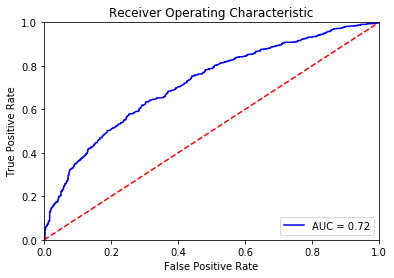

In [98]:
from sklearn import metrics
probs = model.predict_proba(X_held_out)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_held_out, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('OriginalLogistic.png')
plt.show()




In [99]:
from sklearn.decomposition import PCA

nf = 2
pca = PCA(n_components=nf)
# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X_held_out)

vector_list_new = pca.transform(X_held_out)

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_size=[2,3,4,5,6,7,8,9,10]
scores=[]
for i in cluster_size:
    scores.append(silhouette_score(vector_list_new, KMeans(n_clusters=i, random_state=0).fit(vector_list_new).labels_,sample_size=10000))
scores

[0.57527503589507789,
 0.60157395704814576,
 0.6150396440250071,
 0.61906166510017357,
 0.64327943279889954,
 0.6470459590719474,
 0.65237912975352308,
 0.6468198620124993,
 0.58400658391999272]

In [101]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(vector_list_new)

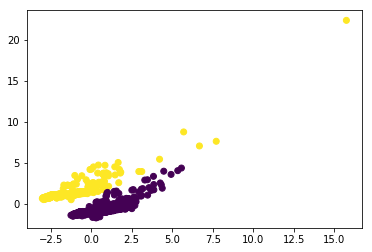

In [102]:
plt.scatter(vector_list_new[:, 0], vector_list_new[:, 1], c=kmeans.labels_)
plt.show()

In [103]:
from sklearn.manifold import TSNE
vector_list_new2=TSNE(n_components=2).fit_transform(X_held_out)

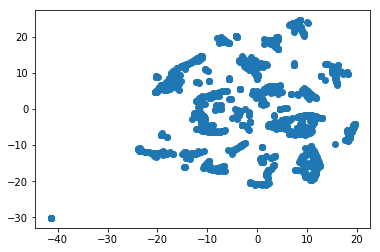

In [104]:
plt.scatter(vector_list_new2[:, 0], vector_list_new2[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.show()

In [105]:
vector_list_new2

array([[-12.00949469,  13.86101874],
       [  2.33748285,  18.43067624],
       [-14.14365504,  12.3964995 ],
       ..., 
       [  0.02885766,   8.85599003],
       [  9.02316504, -14.88798322],
       [ -6.04007713,  18.50250584]])

In [152]:
X_held_out1.describe()

,age,juv_fel_count,juv_other_count,juv_misd_count,priors_count,race_African_American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M
count,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.00000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000
mean,34.681220,0.050589,0.115038,0.098406,3.464310,0.511435,0.004851,0.34650,0.085932,0.003465,0.047817,0.660430,0.339570
std,12.250318,0.364236,0.632512,0.491274,4.766454,0.500043,0.069504,0.47602,0.280361,0.058783,0.213453,0.473728,0.473728
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,78.000000,6.000000,17.000000,8.000000,37.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Index(['age', 'juv_fel_count', 'juv_other_count', 'juv_misd_count',
       'priors_count', 'two_year_recid', 'race_African_American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M', 'is_male'],
      dtype='object')

In [128]:
print(str(X_held_out1.iloc[0,0]))

#print (str(X_held_out1[1][0]) + '\t' + str(X_held_out1[1][4])+ '\t' + str(X_held_out1[1][5]))

60


In [133]:
with open('output1.tsv', 'w') as f:
    f.write('x' + '\t' + 'y' + '\t' + 'age' +  '\t' + 'priors_count'+  '\t' + 'race_African_American'+  '\t' + 'race_Caucasian'+  '\t' + 'race_Hispanic' +  '\t' + 'c_charge_degree_F'+  '\t' + 'c_charge_degree_M'+  '\t' + 'is_male'+  '\t' + 'two_year_recid'+'\n')
    for word in range(0, len(vector_list_new2)):
        f.write(str(vector_list_new2[word][0]) + '\t' + str(vector_list_new2[word][1]) + '\t' + str(X_held_out1.iloc[word,0]) + '\t' + str(X_held_out1.iloc[word,4])+ '\t' + str(X_held_out1.iloc[word,5])+ '\t' + str(X_held_out1.iloc[word,7])+ '\t' + str(X_held_out1.iloc[word,8])+ '\t' + str(X_held_out1.iloc[word,11])+ '\t' + str(X_held_out1.iloc[word,12])+ '\t' + str(X_held_out1.iloc[word,13])+ '\t' + str(y_held_out1.iloc[word])+ '\n')
    f.close()

In [151]:
X_train1.shape

(5771, 14)

In [154]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #to turn categorial variables into numeric arrays
from sklearn import preprocessing #to transform the feature labels
decision_tree=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7)
decision_tree.fit(X_train1,y_train1)
train_model_accuracy= round(decision_tree.score(X_train1,y_train1) * 100, 2) 
test_model_accuracy= round(decision_tree.score(X_held_out1, y_held_out1) * 100, 2) 
print ("Training model accuracy is:",train_model_accuracy)
print ("Test model accuracy is:",test_model_accuracy)

Training model accuracy is: 70.18
Test model accuracy is: 66.53


In [155]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


#
# clf = your classifier

dotfile = StringIO() 
export_graphviz(decision_tree, out_file=dotfile,
                  feature_names=df.columns,  
                        class_names=['Recid', 'No_recid'],  
                         filled=True, rounded=True,  
                         special_characters=True)
                    
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Attempt  to cuztomize sklearn loss function

In [14]:
from scipy.optimize import minimize

parameters = [0] * X_train.shape[1] 

def lik(parameters, X = X_train, Y = y_train):
    L = 0
    for i in range(0, X.shape[0]):
        if Y[i] == 1:
            p_sample = 1 / (1 + np.exp(np.dot(parameters, X[i])))
        if Y[i] == 0:
            p_sample = 1 - 1 / (1 + np.exp(np.dot(parameters, X[i])))
        L = L - p_sample
    return L

lik_model = minimize(lik, parameters, method='L-BFGS-B')
lik_model

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


      fun: -3988.9986892020015
 hess_inv: <14x14 LbfgsInvHessProduct with dtype=float64>
      jac: array([  9.09494702e-05,  -4.54747351e-05,  -9.09494702e-05,
        -9.09494702e-05,   1.81898940e-04,  -1.18234311e-03,
        -4.54747351e-05,   1.18234311e-03,  -4.54747351e-05,
        -4.54747351e-05,  -9.09494702e-05,  -5.91171556e-04,
         5.45696821e-04,   5.45696821e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 825
      nit: 34
   status: 0
  success: True
        x: array([ 2867.87473318, -1399.15764768,  -797.97862205,  -175.54743972,
       -4904.55565116,  -152.36429904,    62.07483676,   246.69382432,
          52.94442178,   -31.01974882,  -262.89252689,    33.99943248,
         -34.42661445,  -196.49711919])